#### 1. `benchmarking_script`

| Size     | `forward_time`        | `foward_time_no_warmup` | `backward_time`       | `backward_time_no_warmup` |
|----------|-----------------------|-------------------------|-----------------------|---------------------------|
| `small`  | 14.56ms $\pm$ 0.05ms  | 100.30ms $\pm$ 168.70ms | 28.59ms $\pm$ 0.08ms  | 30.20ms $\pm$ 3.74ms      |
| `medium` | 40.52ms $\pm$ 0.25ms  | 115.30ms $\pm$ 151.77ms | 77.86ms $\pm$ 0.22ms  | 79.5ms $\pm$ 3.55ms       |
| `large`  | 94.21ms $\pm$ 1.78ms  | 163.40ms $\pm$ 137.11ms | 181ms $\pm$ 0.61ms    | 183.00ms $\pm$ 3.00ms     |
| `xl`     | 184.46ms $\pm$ 0.03ms | 251.71ms $\pm$ 136.15ms | 346.84ms $\pm$ 0.40ms | 34.68ms $\pm$ 1.48ms      |
| `2.7b`   | 277.16ms $\pm$ 0.17ms | 341.42ms $\pm$ 127.94ms | 519.4ms $\pm$ 0.36ms  | 520.67ms $\pm$ 1.62ms     |

We see that without warmup, there is substantial variation. But once warmup is done, the variation becomes much smaller.

#### 2. `function_call_table`

##### Forward pass only

| Name                      | Self CPU % | Self CPU   | CPU total % | CPU total  | CPU time avg | Self CUDA | Self CUDA % | CUDA total  | CUDA time avg | # of Calls |
|---------------------------|------------|------------|-------------|------------|--------------|-----------|-------------|-------------|---------------|------------|
| `forward_pass`            | 8.91%      | 77.687ms   | 100.00%     | 871.980ms  | 174.396ms    | 0.000us   | 0.00%       | 964.580ms   | 192.916ms     | 5          |
| `cudaDeviceSynchronize`   | 31.85%     | 277.714ms  | 31.85%      | 277.714ms  | 46.286ms     | 0.000us   | 0.00%       | 0.000us     | 0.000us       | 6          |
| `aten::matmul`            | 1.46%      | 12.693ms   | 24.09%      | 210.045ms  | 109.114us    | 0.000us   | 0.00%       | 775.794ms   | 403.010us     | 1925       |
| `cudaMalloc`              | 17.18%     | 149.829ms  | 17.18%      | 149.829ms  | 151.342us    | 16.333ms  | 1.95%       | 20.534ms    | 20.741us      | 990        |
| `cudaLaunchKernel`        | 16.38%     | 142.868ms  | 16.38%      | 142.868ms  | 17.814us     | 53.357ms  | 6.36%       | 53.357ms    | 6.653us       | 8020       |
| `aten::clone`             | 0.56%      | 4.859ms    | 10.95%      | 95.520ms   | 79.600us     | 0.000us   | 0.00%       | 30.275ms    | 25.229us      | 1200       |
| `aten::reshape`           | 0.55%      | 4.802ms    | 10.83%      | 94.431ms   | 39.102us     | 0.000us   | 0.00%       | 19.997ms    | 8.280us       | 2415       |
| `aten::linear`            | 1.09%      | 9.535ms    | 10.65%      | 92.830ms   | 64.242us     | 0.000us   | 0.00%       | 673.874ms   | 466.349us     | 1445       |
| `aten::mm`                | 3.28%      | 28.563ms   | 8.04%       | 70.081ms   | 48.499us     | 695.282ms | 82.93%      | 729.983ms   | 505.179us     | 1445       |
| `aten::copy_`             | 0.87%      | 7.558ms    | 7.09%       | 61.793ms   | 42.912us     | 20.959ms  | 2.50%       | 29.142ms    | 20.238us      | 1440       |
| `aten::div`               | 0.99%      | 8.656ms    | 6.24%       | 54.445ms   | 75.618us     | 18.355ms  | 2.19%       | 33.521ms    | 46.557us      | 720        |
| `aten::mean`              | 0.71%      | 6.208ms    | 5.47%       | 47.734ms   | 97.416us     | 2.934ms   | 0.35%       | 4.603ms     | 9.394us       | 490        |

Self CPU time total: 871.982ms \
Self CUDA time total: 838.380ms


##### Forward and backword pass

| Name                                            | Self CPU % | Self CPU   | CPU total % | CPU total  | CPU time avg | Self CUDA | Self CUDA % | CUDA total  | CUDA time avg | # of Calls |
|-------------------------------------------------|------------|------------|-------------|------------|--------------|-----------|-------------|-------------|---------------|------------|
| `backward_pass`                                 | 30.59%     | 1.355s     | 39.44%      | 1.747s     | 349.449ms    | 0.000us   | 0.00%       | 270.000us   | 54.000us      | 5          |
| `cudaLaunchKernel`                              | 22.51%     | 997.371ms  | 22.51%      | 997.371ms  | 15.949us     | 227.253ms | 7.75%       | 227.296ms   | 3.635us       | 62535      |
| `forward_pass`                                  | 1.61%      | 71.378ms   | 19.94%      | 883.430ms  | 176.686ms    | 0.000us   | 0.00%       | 932.774ms   | 186.555ms     | 5          |
| `cudaDeviceSynchronize`                         | 17.19%     | 761.494ms  | 17.19%      | 761.494ms  | 47.593ms     | 0.000us   | 0.00%       | 0.000us     | 0.000us       | 16         |
| `optimizer`                                     | 0.66%      | 29.223ms   | 12.21%      | 540.849ms  | 108.170ms    | 0.000us   | 0.00%       | 537.340ms   | 107.468ms     | 5          |
| `aten::mul`                                     | 2.64%      | 117.060ms  | 9.79%       | 433.582ms  | 23.200us     | 254.347ms | 8.67%       | 327.905ms   | 17.545us      | 18689      |
| `autograd::engine::evaluate_function: MulBackward0` | 0.18%  | 8.123ms    | 9.21%       | 408.143ms  | 281.478us    | 0.000us   | 0.00%       | 102.511ms   | 70.697us      | 1450       |
| `Optimizer.step#AdamW.step`                      | 2.41%      | 106.711ms  | 9.07%       | 401.945ms  | 80.389ms     | 0.000us   | 0.00%       | 440.259ms   | 88.052ms      | 5          |
| `aten::mm`                                       | 1.50%      | 66.324ms   | 6.54%       | 289.659ms  | 66.819us     | 2.077s    | 70.82%      | 2.135s      | 492.518us     | 4335       |
| `aten::copy_`                                    | 0.31%      | 13.933ms   | 5.93%       | 262.931ms  | 84.138us     | 48.622ms  | 1.66%       | 64.019ms    | 20.486us      | 3125       |
| `autograd::engine::evaluate_function: MmBackward0` | 0.09%    | 3.895ms    | 5.80%       | 257.110ms  | 177.931us    | 0.000us   | 0.00%       | 1.413s      | 978.183us     | 1445       |

Self CPU time total: 4.430s \
Self CUDA time total: 2.932s

* (a) I perform the experiemnt with 1 wramup step and 5 measurement step. The total time is 871.98ms, which matches the benchmarking number up to 50ms discrepency. 
* (b) The kernel that takes most time is `aten::mm`, invoked 1445 times. During a single forward pass, it is invoked 289 times. It is indeed the same kernel that takes most run time also during the forward/backward pass.
* (c) `cudaLaunchKernel`.
* (d) `aten::mm` takes 82.93% of CUDA time when doing inference only. When we do both forward and backward pass, it took 70.82% of time.

#### 3. `flame_graph`

<img src="out/profiling_xl_only_forward_lm-flame-graph.svg" alt="Forward-only SVG">


* (a) The cyclic pattern come from the repreated layers of the network.
* (b) The RMSNorm costs about 2.9% of the time.
* (c) The SoftMax costs about 3.8% of the time.
* (d) The vast majority of time is spent on `<built-in_function_linear>`, which matches my expectation. 

#### 4. `bechmarking_mixed_precision`

| Size     | `forward_time`        | `forward_time_mixed`          | `backward_time`       | `backward_time_mixed`        |
|----------|-----------------------|-------------------------------|-----------------------|-------------------------------|
| `small`  | 14.56ms $\pm$ 0.05ms  | 10.54ms $\pm$ 3.27ms          | 28.59ms $\pm$ 0.08ms  | 19.36ms $\pm$ 2.29ms          |
| `medium` | 40.52ms $\pm$ 0.25ms  | 22.51ms $\pm$ 11.19ms         | 77.86ms $\pm$ 0.22ms  | 42.46ms $\pm$ 0.13ms          |
| `large`  | 94.21ms $\pm$ 1.78ms  | 36.88ms $\pm$ 0.30ms          | 181ms $\pm$ 0.61ms    | 81.11ms $\pm$ 0.13ms          |
| `xl`     | 184.46ms $\pm$ 0.03ms | 63.53ms $\pm$ 9.67ms          | 346.84ms $\pm$ 0.40ms | 134.66ms $\pm$ 0.30ms         |
| `2.7b`   | 277.16ms $\pm$ 0.17ms | 81.57ms $\pm$ 0.11ms          | 519.4ms $\pm$ 0.36ms  | 145.88ms $\pm$ 0.21ms         |


* (a) Mixed precisoin is significantly faster than full precision. As the model size gets larger, the speed up became more and more dramatic.
* (b) Please see the log below:
    ```
    dtype of model parameters fc1:  torch.float32
    dtype of model parameters fc2:  torch.float32
    dtype of model parameters ln:  torch.float32
    dtype of fc1 output:  torch.float16
    dtype of ln output:  torch.float32
    dtype of model's predicted logits:  torch.float16
    dtype of loss:  torch.float32
    dtype of model parameters fc1.grad:  torch.float32
    dtype of model parameters fc2.grad:  torch.float32
    dtype of model parameters ln.grad:  torch.float32
    ```
* (c) The accumulation of squred sum makes RMSNorm sensitive to numeric errors. If we use BF16 instead of FP16, the need for RMSNorm is reduced because the larger dynamic range of BF16. However, the code still uses full precision for the RMSNorm layer.
    ```
    dtype of model parameters fc1:  torch.float32
    dtype of model parameters fc2:  torch.float32
    dtype of model parameters ln:  torch.float32
    dtype of fc1 output:  torch.bfloat16
    dtype of ln output:  torch.float32
    dtype of model's predicted logits:  torch.bfloat16
    dtype of loss:  torch.float32
    dtype of model parameters fc1.grad:  torch.float32
    dtype of model parameters fc2.grad:  torch.float32
    dtype of model parameters ln.grad:  torch.float32
    ```

#### 5. `pytorch_layernorm`

##### Layernorm timing:

| Hidden Dimension  | LayerNorm Time (ms)| RMSNorm Time (ms)  |
|-------------------|--------------------|--------------------|
| 1024              | 0.20               | 0.57               |
| 2048              | 0.34               | 1.11               |
| 4096              | 0.84               | 2.16               |
| 8192              | 1.71               | 4.26               |

##### Layernorm in network:

| Size     | `forward_time`        | `forward_time_layernorm`             | `backward_time`       | `backward_time_layernorm`            |
|----------|-----------------------|--------------------------------------|-----------------------|--------------------------------------|
| `small`  | 14.56ms $\pm$ 0.05ms  | 13.85ms $\pm$ 0.02ms                 | 28.59ms $\pm$ 0.08ms  | 26.51ms $\pm$ 0.09ms                 |
| `medium` | 40.52ms $\pm$ 0.25ms  | 38.08ms $\pm$ 0.09ms                 | 77.86ms $\pm$ 0.22ms  | 73.34ms $\pm$ 0.22ms                 |
| `large`  | 94.21ms $\pm$ 1.78ms  | 91.55ms $\pm$ 0.07ms                 | 181ms $\pm$ 0.61ms    | 173.29ms $\pm$ 0.12ms                |
| `xl`     | 184.46ms $\pm$ 0.03ms | 179.46ms $\pm$ 0.09ms                | 346.84ms $\pm$ 0.40ms | 334.06ms $\pm$ 0.12ms                |
| `2.7b`   | 277.16ms $\pm$ 0.17ms | 266.74ms $\pm$ 0.06ms                | 519.4ms $\pm$ 0.36ms  | 506.62ms $\pm$ 0.16ms                |


* (a) The LayerNorm is faster than RMSNorm. The difference is more pronounced as the hidden dimension increases. This is arrises from suboptimal implementation of RMSNorm `pow()` and `mean()` operation. These two kernels are not fused together, which makes RMSNorm slower than LayerNorm.
* (b) Pytorch's native LayerNorm took noticably shorter time then RMSNorm.

#### 6. `rmsnorm_forward_benchmarking`

| Hidden Dimension  |LayerNorm Time (ms) |RMSNorm Time (ms)   |RMSNorm Triton Time (ms) |
|-------------------|--------------------|--------------------|-------------------------|
| 1024              | 0.20               | 0.57               | 0.23                    |
| 2048              | 0.34               | 1.11               | 0.34                    |
| 4096              | 0.83               | 2.16               | 0.61                    |
| 8192              | 1.71               | 4.26               | 1.14                    |

#### 7. `rmsnorm_jvp_g`

Let $X\in\mathbb{R}^{N\times H}, g\in\mathbb{R}^H, y=\mathbb{R}^{N\times H}$, where 
$$
y_{ij} = \frac{x_{ij}}{\sqrt{H^{-1}\sum_{j=1}^H X_{ij}^2 + \epsilon}} g_{j}.
$$
Let $\frac{\partial L}{\partial y}\in\mathbb{R}^{N\times H}$ be the upstream gradient and $\tilde{X}\in\mathbb{R}^{N\times H}$ be such that
$$
\tilde{X}_{ij} = \frac{X_{ij}}{\sqrt{H^{-1}\sum_{j=1}^H X_{ij}^2 + \epsilon}}.
$$
The gradient w.r.t. $g$ is
$$
\frac{\partial L}{\partial g} = \text{diag}
\left[
\left(\frac{\partial L}{\partial y}\right)^T \tilde{X}
\right]
$$

#### 8. `rmsnorm_jvp_g`

Following the notation from previous parts, additionally introduce 

$$
Z_{im} = \frac{H^{-1}x_{im}g_{m}}{\left[H^{-1}\sum_{\ell=1}^H x_{i\ell}^2 + \epsilon \right]^{3/2}}
$$

$$
W_{ij} = \frac{g_j}{\left[H^{-1}\sum_{\ell=1}^H x_{i\ell}^2 + \epsilon \right]^{1/2}}
$$
Given those,

$$
\frac{\partial L}{\partial x_{ij}} =
\frac{\partial L}{\partial y_{ij}} W_{ij} -x_{ij} \sum_{m=1}^H \frac{\partial L}{\partial y_{im}} Z_{im}
$$

#### 9. `rmsnorm_benchmarking`

* (a)

    | Hidden Dimension  |LayerNorm Forward (ms) |RMSNorm Forward (ms) |RMSNorm Triton Forward (ms) |LayerNorm Backward (ms) |RMSNorm Backward (ms) |RMSNorm Triton Backward (ms) |
    |-------------------|------------------------|----------------------|---------------------------|-----------------------|---------------------|----------------------------|
    | 1024              | 0.20                   | 0.58                 | 0.25                      | 1.27               | 2.01             | 0.70                      |
    | 2048              | 0.34                   | 1.11                 | 0.36                      | 1.73               | 3.84             | 1.22                      |
    | 4096              | 0.83                   | 2.17                 | 0.62                      | 2.92               | 7.54             | 2.28                      |
    | 8192              | 1.72                   | 4.27                 | 1.16                      | 5.42               | 14.96             | 4.59                      |



* (b) With the Triton implementation, I get substantial speed up over the PyTroch implementation. However, the over all speed is still slower than native pytorch nn.LayerNorm.

    | Size     | `forward_time`               | `forward_time_layernorm`             | `backward_time`             | `backward_time_layernorm`            |
    |----------|------------------------------|--------------------------------------|-----------------------------|--------------------------------------|
    | `small`  | 13.96ms $\pm$ 0.02ms         | 13.85ms $\pm$ 0.02ms                 | 26.86ms $\pm$ 0.03ms        | 26.51ms $\pm$ 0.09ms                 |
    | `medium` | 39.59ms $\pm$ 0.07ms         | 38.08ms $\pm$ 0.09ms                 | 73.70ms $\pm$ 0.04ms        | 73.34ms $\pm$ 0.22ms                 |
    | `large`  | 92.70ms $\pm$ 0.04ms         | 91.55ms $\pm$ 0.07ms                 | 174.10ms $\pm$ 0.06ms       | 173.29ms $\pm$ 0.12ms                |
    | `xl`     | 181.06ms $\pm$ 0.09ms        | 179.46ms $\pm$ 0.09ms                | 335.41ms $\pm$ 0.05ms       | 334.06ms $\pm$ 0.12ms                |
    | `2.7b`   | 273.50ms $\pm$ 0.10ms        | 266.74ms $\pm$ 0.06ms                | 507.53ms $\pm$ 0.08ms       | 506.62ms $\pm$ 0.16ms                |



#### 10. `torch_compile`

* (a) (b)

    | Hidden Dimension  |LayerNorm Forward (ms) |RMSNorm Forward (ms) |RMSNorm Triton Forward (ms) |RMSNorm Compile Forward (ms) |LayerNorm Backward (ms) |RMSNorm Backward (ms) |RMSNorm Triton Backward (ms) |RMSNorm Compile Backward (ms) |
    |-------------------|------------------------|----------------------|---------------------------|-----------------------------|-----------------------|---------------------|----------------------------|------------------------------|
    | 1024              | 0.20                   | 0.58                 | 0.25                      | 0.22                        | 1.06               | 2.00             | 0.92                      | 1.43                        |
    | 2048              | 0.34                   | 1.11                 | 0.36                      | 0.35                        | 1.73               | 3.84             | 1.43                      | 1.62                        |
    | 4096              | 0.83                   | 2.17                 | 0.63                      | 0.63                        | 2.92               | 7.54             | 2.51                      | 3.03                        |
    | 8192              | 1.73                   | 4.27                 | 1.16                      | 1.38                        | 5.41               | 14.94             | 4.86                      | 5.03                        |

* (c)
    | Size     | `forward_time`        | `forward_time_compiled` | `backward_time`       | `backward_compiled`        |
    |----------|-----------------------|-------------------------|-----------------------|----------------------------|
    | `small`  | 14.56ms ± 0.05ms      | 11.83ms ± 0.31ms        | 28.59ms ± 0.08ms      | 22.15ms ± 0.03ms           |
    | `medium` | 40.52ms ± 0.25ms      | 34.06ms ± 0.49ms        | 77.86ms ± 0.22ms      | 61.55ms ± 0.12ms           |
    | `large`  | 94.21ms ± 1.78ms      | 81.23ms ± 2.85ms        | 181ms ± 0.61ms        | 152.79ms ± 0.01ms          |
    | `xl`     | 184.46ms ± 0.03ms     | 164.21ms ± 0.10ms       | 346.84ms ± 0.40ms     | 299.54ms ± 0.01ms          |
    | `2.7b`   | 277.16ms ± 0.17ms     | 257.72ms ± 0.08ms       | 519.4ms ± 0.36ms      | 473.74ms ± 0.13ms          |


#### 11. `memory profiling`


* (a) The timeline is perodic. 
    Forward only:
    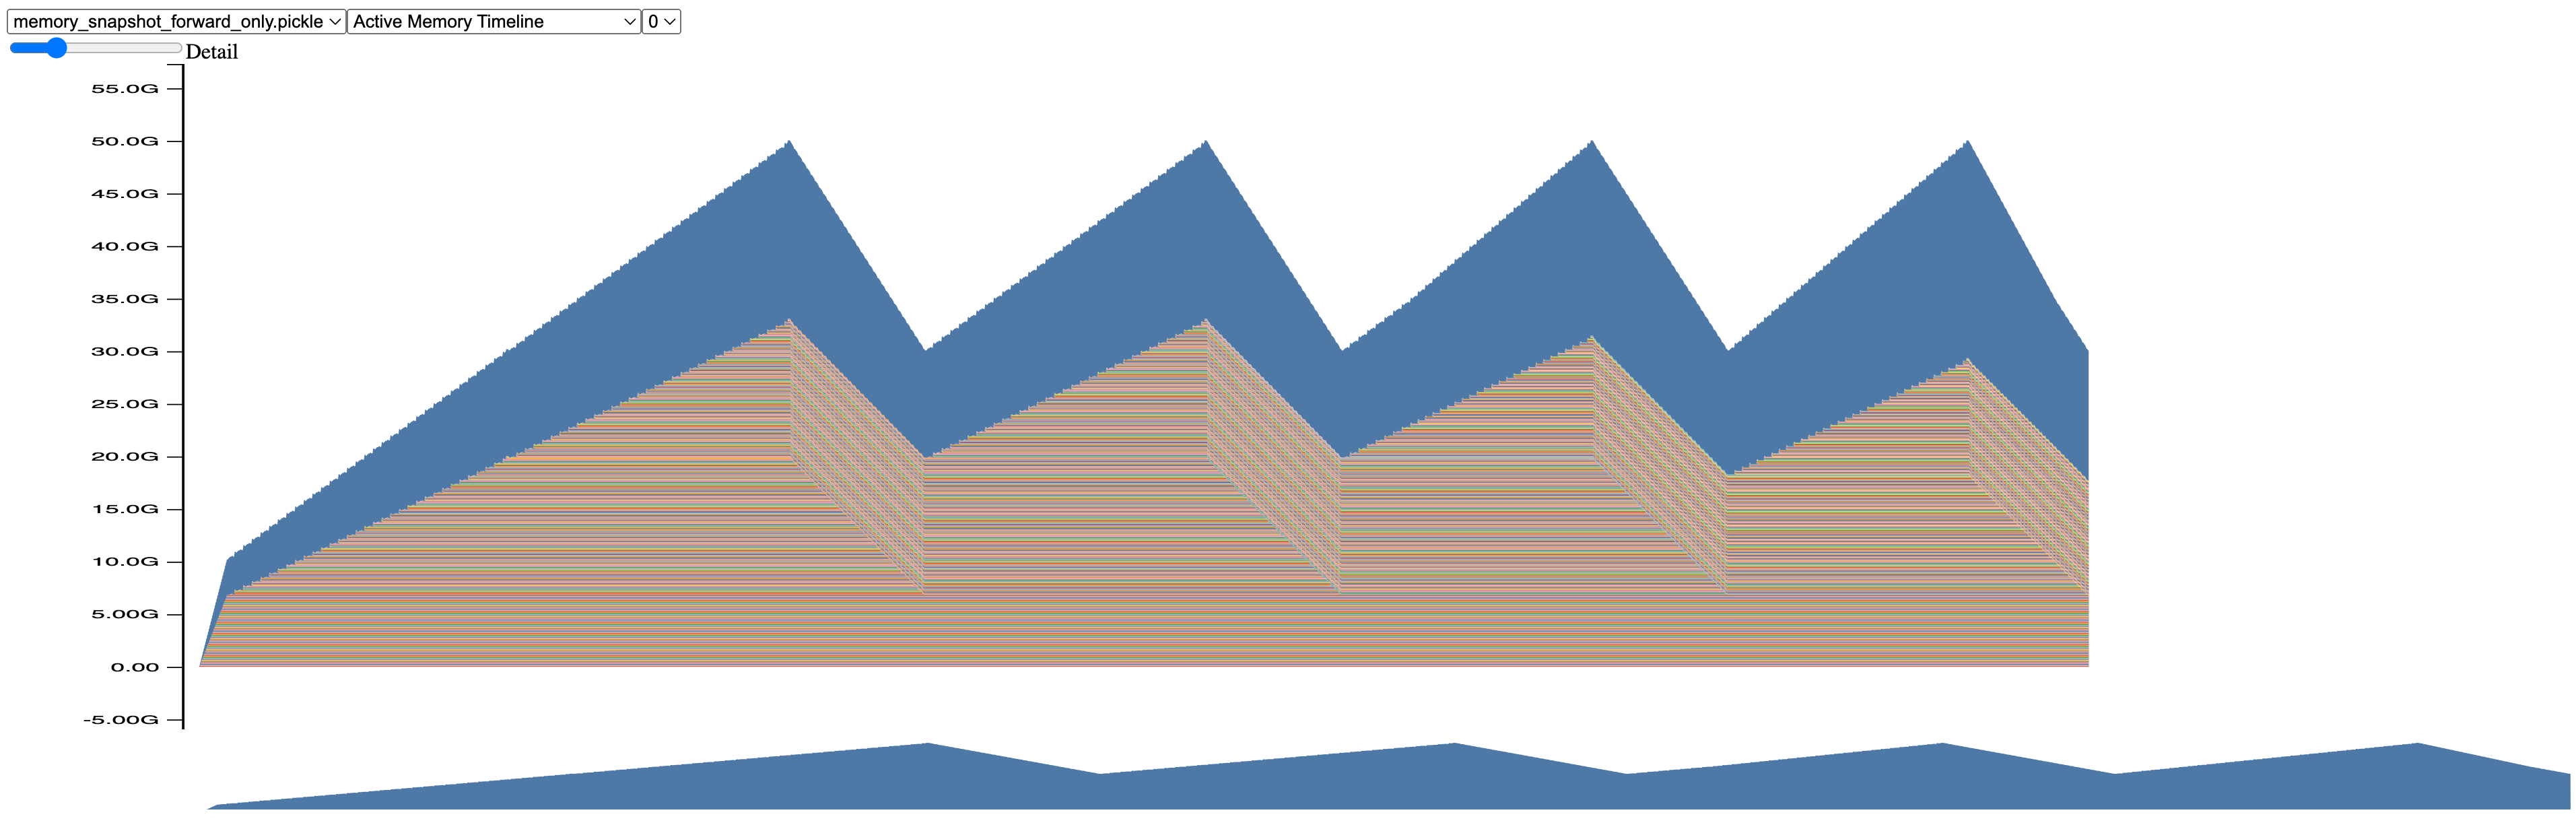
    Forward backword:
    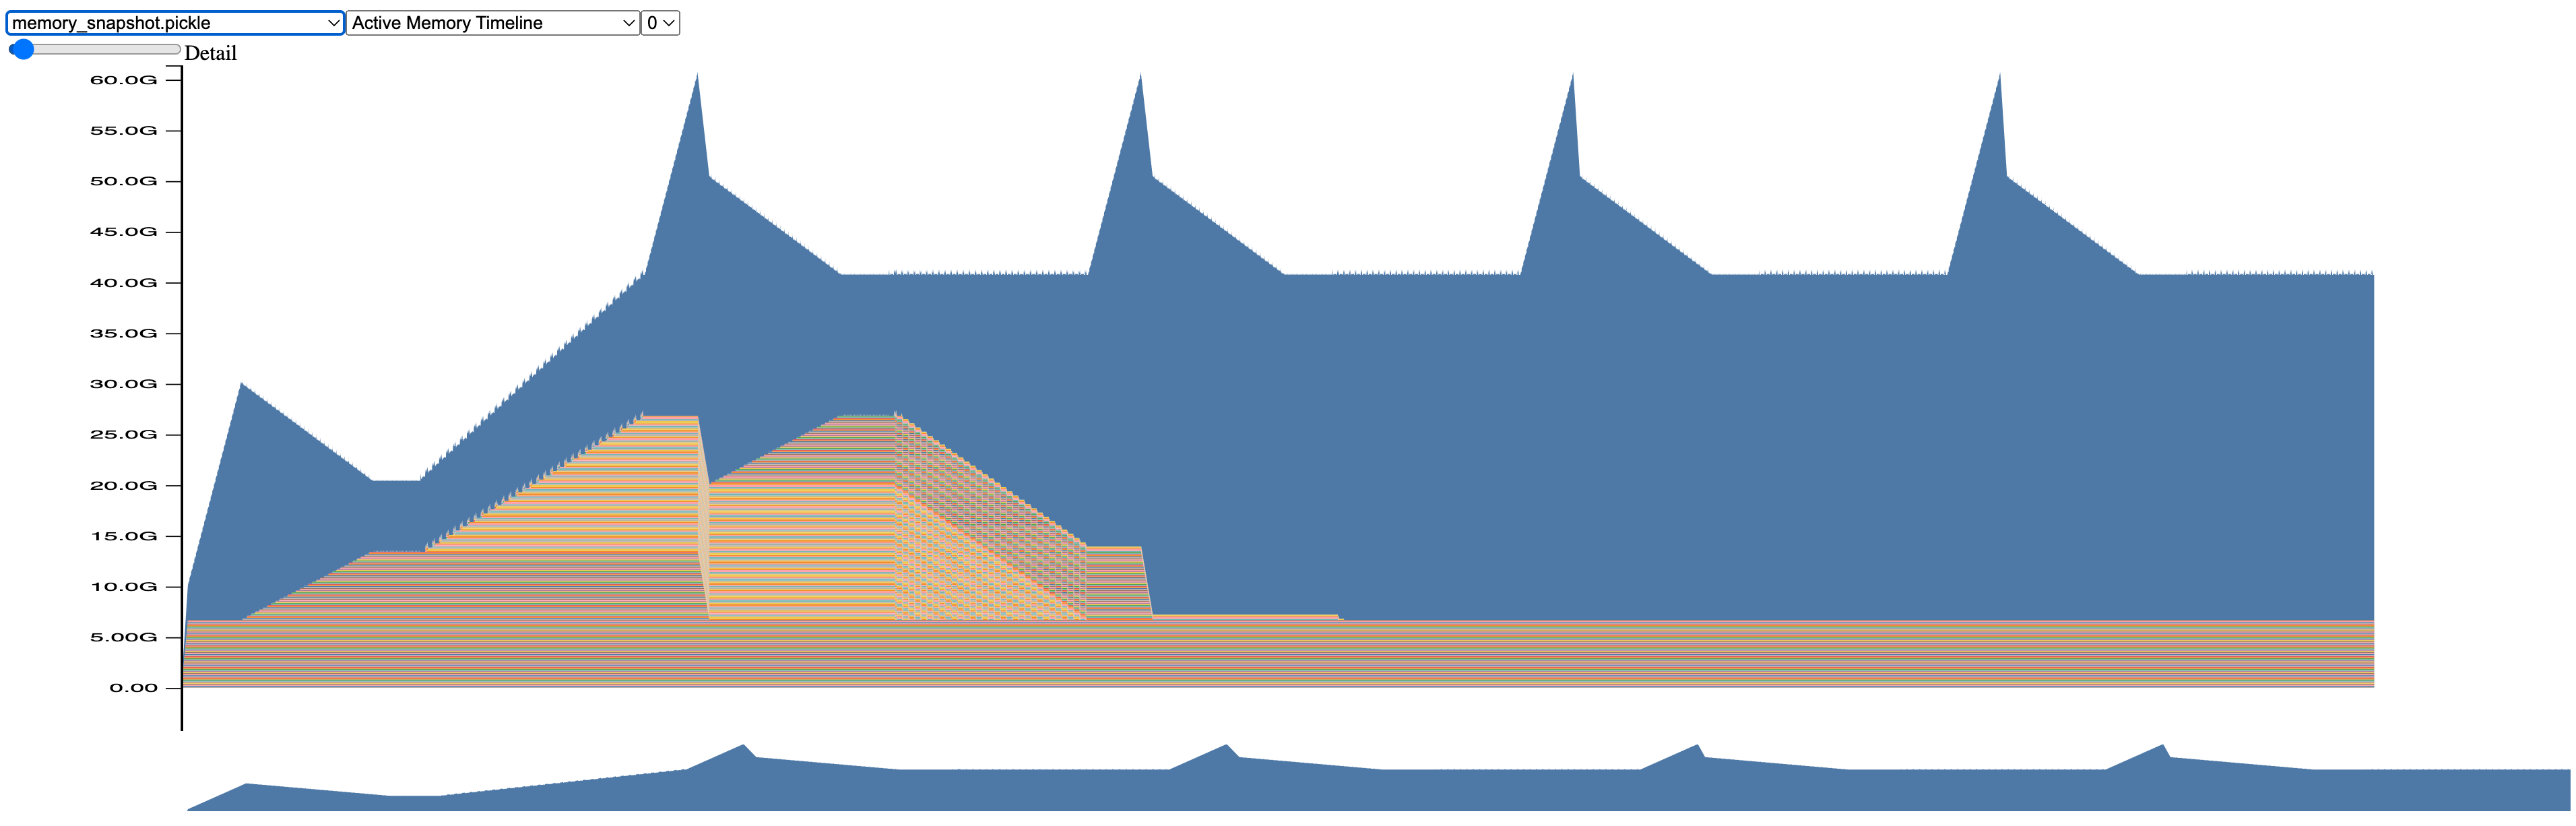


* (b) (c) Mixed precision affect memory useage by a small amount
    | Size       | forward (GB) | forward+backward (GB) |
    |------------|--------------|-----------------------|
    | small      | 4.5          | 5.5                   |
    | medium     | 11.5         | 14                    |
    | large      | 23           | 26                    |
    | 2p7b       | 40           | 60                    |
    | 2p7b mixed | 40           | 58                    |

* (d) The size of tensor in residual connnection is `(2560*128*16*4)/(1024**2)=20MB`

* (e) The primary memory comes from saving the weights of the model.